# **[OK]**

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.models import Sequential

data = pd.read_csv('../../data/nama-gender-titik.csv', sep=";")
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'f' else 0)
names = data[['nama', 'gender']].values.tolist()

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

In [4]:
x_train = np.array([name_to_vector(name[0]) for name in names])
y_train = np.array([name[1] for name in names])

In [9]:
max_len = 29

model = Sequential()
# model.add(tf.keras.layers.Conv1D(64, 3, activation='relu', input_shape=(max_len, 1)))
model.add(tf.keras.layers.Embedding(input_dim=3, output_dim=32, input_length=max_len))
model.add(tf.keras.layers.SimpleRNN(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
hist = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=5000)

Epoch 1/10
100/100 [==============================] - 62s 624ms/step - loss: 0.2445 - accuracy: 0.9034 - val_loss: 0.3619 - val_accuracy: 0.8457
Epoch 2/10
100/100 [==============================] - 65s 647ms/step - loss: 0.2356 - accuracy: 0.9074 - val_loss: 0.3551 - val_accuracy: 0.8469
Epoch 3/10
100/100 [==============================] - 65s 646ms/step - loss: 0.2313 - accuracy: 0.9084 - val_loss: 0.3784 - val_accuracy: 0.8395
Epoch 4/10
100/100 [==============================] - 64s 642ms/step - loss: 0.2289 - accuracy: 0.9098 - val_loss: 0.3544 - val_accuracy: 0.8474
Epoch 5/10
100/100 [==============================] - 64s 637ms/step - loss: 0.2286 - accuracy: 0.9098 - val_loss: 0.3490 - val_accuracy: 0.8491
Epoch 6/10
100/100 [==============================] - 64s 643ms/step - loss: 0.2257 - accuracy: 0.9108 - val_loss: 0.3506 - val_accuracy: 0.8474
Epoch 7/10
100/100 [==============================] - 64s 635ms/step - loss: 0.2230 - accuracy: 0.9119 - val_loss: 0.3538 - val_ac

In [18]:
model.save('../../models/gender-rnn-base.h5')

In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 27, 64)            256       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,737
Trainable params: 12,737
Non-trainable params: 0
_________________________________________________________________


In [20]:
score = model.evaluate(x_train, y_train, batch_size=64)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

9754/9754 [==============================] - 361s 37ms/step - loss: 0.2777 - accuracy: 0.8850

ACCURACY: 0.884978175163269
LOSS: 0.27773720026016235


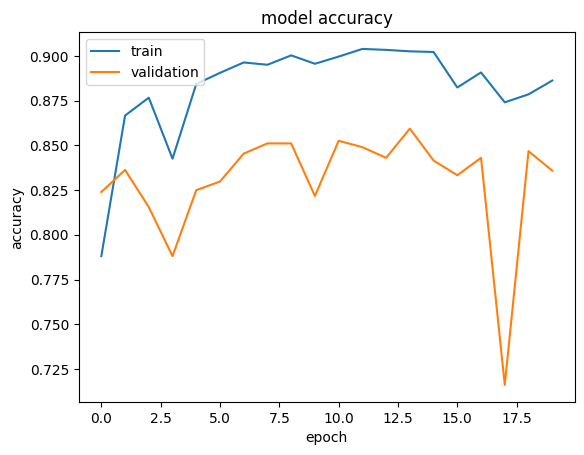

In [17]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

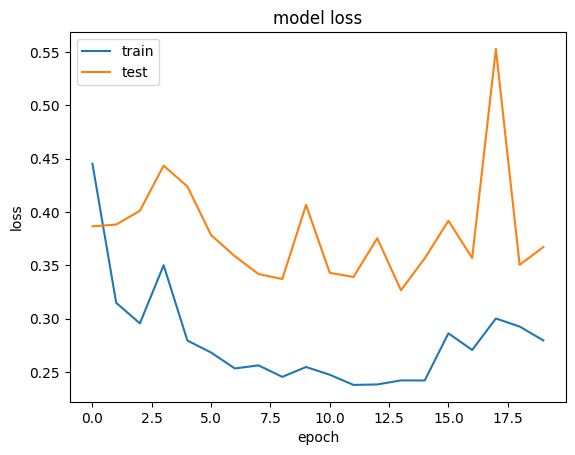

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
import numpy as np
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

labels_pred = model.predict(x_train)
labels_pred = np.round(labels_pred.flatten())
accuracy = accuracy_score(y_train, labels_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

19508/19508 [==============================] - 675s 35ms/step
Accuracy: 88.50%


In [23]:
print(classification_report(y_train, labels_pred, digits=5))

              precision    recall  f1-score   support

           0    0.88116   0.89858   0.88978    322536
           1    0.88923   0.87044   0.87974    301702

    accuracy                        0.88498    624238
   macro avg    0.88520   0.88451   0.88476    624238
weighted avg    0.88506   0.88498   0.88493    624238



In [1]:
import tensorflow as tf
import numpy as np
    
model = tf.keras.models.load_model('../../models/gender-rnn-base.h5')

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence
    
def predict_gender(name):
    name_vector = np.array(name_to_vector(name))
    padded_name_vector = tf.keras.preprocessing.sequence.pad_sequences([name_vector], maxlen=29, padding='post', truncating='post')
    prediction = model.predict(padded_name_vector)
    
    if prediction < 0.5:
        return 'Male'
    else:
        return 'Female'

nama = [
    'Novi', 
    'Novia Kumala Sari', 
    'Novianto Rahmadi', 
    'Melani', 
    'Malik', 
    'Melani Malik', 
    'Annisa', 
    'Annisa Rahmadi', 
    'Annisa Rahma Adi',
    'Putra Saputri', 
    'Putri Saputra', 
    'Rizki Saputri', 
    'Dwi Syafutra', 
]

for i in nama:
    print(i + ' = ' + predict_gender(i))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-28 10:13:26.277573: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 378ms/step
Novi = Male
1/1 [==============================] - 0s 71ms/step
Novia Kumala Sari = Female
1/1 [==============================] - 0s 55ms/step
Novianto Rahmadi = Male
1/1 [==============================] - 0s 55ms/step
Melani = Female
1/1 [==============================] - 0s 74ms/step
Malik = Male
1/1 [==============================] - 0s 68ms/step
Melani Malik = Female
1/1 [==============================] - 0s 56ms/step
Annisa = Female
1/1 [==============================] - 0s 65ms/step
Annisa Rahmadi = Female
1/1 [==============================] - 0s 65ms/step
Annisa Rahma Adi = Female
1/1 [==============================] - 0s 61ms/step
Putra Saputri = Female
1/1 [==============================] - 0s 70ms/step
Putri Saputra = Male
1/1 [==============================] - 0s 76ms/step
Rizki Saputri = Female
1/1 [==============================] - 0s 65ms/step
Dwi Syafutra = Male


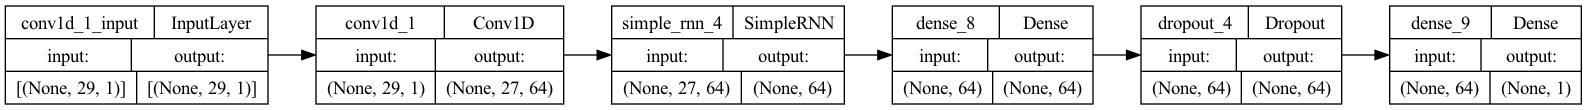

In [22]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model

model = tf.keras.models.load_model('../../models/gender-rnn-base.h5')
plot_model(model, to_file='../../assets/model-keras-rnn.png', show_shapes=True, rankdir="LR")